In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
import pandas as pd
df=pd.read_csv('texas_1.csv')
df

,Unnamed: 0,County,Count,total_pop_estimate,white_estimate,med_inc_estimate,white_percentage
0,0,Anderson County,1,204592,159828,62347,0.781204
1,1,Angelina County,3,86608,61095,57055,0.705420
2,2,Aransas County,2,24048,19514,58168,0.811460
3,3,Austin County,1,30406,22162,73556,0.728869
4,4,Bandera County,1,21182,16997,70965,0.802427
...,...,...,...,...,...,...,...
98,98,Washington County,2,4817,4426,59087,0.918829
99,99,Webb County,7,267282,143491,59984,0.536852
100,100,Wharton County,2,41614,29464,59712,0.708031
101,101,Wichita County,1,2131,1695,69551,0.795401


In [5]:
%%R
 

texas_df <- read_csv('texas_1.csv', show_col_types = FALSE)
texas_df

New names:
• `` -> `...1`
# A tibble: 103 × 7
    ...1 County         Count total_pop_estimate white_estimate med_inc_estimate
   <dbl> <chr>          <dbl>              <dbl>          <dbl>            <dbl>
 1     0 Anderson Coun…     1             204592         159828            62347
 2     1 Angelina Coun…     3              86608          61095            57055
 3     2 Aransas County     2              24048          19514            58168
 4     3 Austin County      1              30406          22162            73556
 5     4 Bandera County     1              21182          16997            70965
 6     5 Bastrop County     3              98435          59508            80151
 7     6 Bee County         2              30977          20148            50283
 8     7 Bell County       14              24248          22897            33658
 9     8 Bexar County      75            2014059        1150364            67275
10     9 Blanco County      1              11608           9384

## Here I am looking into whether a high white population influences median income. 

In [6]:
%%R

model <- lm(white_percentage~med_inc_estimate, data=texas_df)
summary(model)


Call:
lm(formula = white_percentage ~ med_inc_estimate, data = texas_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37567 -0.07365 -0.00418  0.08060  0.23575 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.955e-01  4.591e-02  17.328   <2e-16 ***
med_inc_estimate -9.965e-07  6.438e-07  -1.548    0.125    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1244 on 101 degrees of freedom
Multiple R-squared:  0.02317,	Adjusted R-squared:  0.0135 
F-statistic: 2.396 on 1 and 101 DF,  p-value: 0.1248



`geom_smooth()` using formula = 'y ~ x'


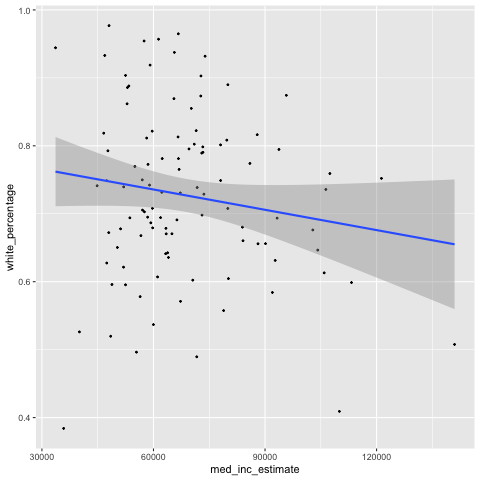

In [7]:
%%R
library(ggplot2)
ggplot(texas_df, aes(x=med_inc_estimate, y=white_percentage)) + 
geom_point(size = 0.5)+
geom_smooth(method="lm")

## Here I am looking at whether a higher population impacts the number of private schools in the county. 

In [8]:
%%R

model <- lm(Count~total_pop_estimate, data=texas_df)
summary(model)


Call:
lm(formula = Count ~ total_pop_estimate, data = texas_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.242  -4.893  -3.762  -2.899 176.695 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.137e+00  2.493e+00   1.660      0.1    
total_pop_estimate 3.345e-05  6.260e-06   5.344 5.66e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.48 on 101 degrees of freedom
Multiple R-squared:  0.2204,	Adjusted R-squared:  0.2127 
F-statistic: 28.55 on 1 and 101 DF,  p-value: 5.658e-07



`geom_smooth()` using formula = 'y ~ x'


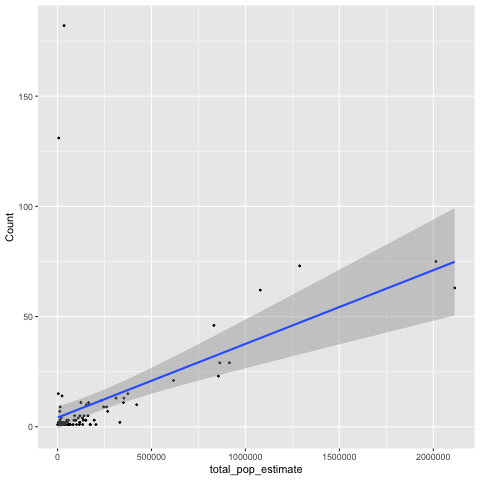

In [9]:
%%R
library(ggplot2)
ggplot(texas_df, aes(x=total_pop_estimate, y=Count)) + 
geom_point(size = 0.5)+
geom_smooth(method="lm")

## I will now conduct multivariable regressions. Does total population and a high median income impact the number of private schools per county? 

In [10]:
%%R

model <- lm(Count~total_pop_estimate + med_inc_estimate, data=texas_df)
summary(model)


Call:
lm(formula = Count ~ total_pop_estimate + med_inc_estimate, data = texas_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.315  -4.888  -3.761  -2.899 176.674 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.068e+00  8.541e+00   0.476    0.635    
total_pop_estimate 3.343e-05  6.735e-06   4.964 2.85e-06 ***
med_inc_estimate   1.053e-06  1.252e-04   0.008    0.993    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.59 on 100 degrees of freedom
Multiple R-squared:  0.2204,	Adjusted R-squared:  0.2048 
F-statistic: 14.14 on 2 and 100 DF,  p-value: 3.922e-06



## Here's another. Does total populatio, high median income and the amount of white people impact the number of private schools per county?¶

In [11]:
%%R

model <- lm(Count~total_pop_estimate + med_inc_estimate + white_percentage, data=texas_df)
summary(model)


Call:
lm(formula = Count ~ total_pop_estimate + med_inc_estimate + 
    white_percentage, data = texas_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.412  -5.874  -3.568  -1.798 177.152 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.637e+01  1.701e+01   0.962    0.338    
total_pop_estimate  3.128e-05  7.217e-06   4.335 3.51e-05 ***
med_inc_estimate   -8.412e-07  1.254e-04  -0.007    0.995    
white_percentage   -1.620e+01  1.937e+01  -0.837    0.405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.63 on 99 degrees of freedom
Multiple R-squared:  0.2259,	Adjusted R-squared:  0.2024 
F-statistic: 9.629 on 3 and 99 DF,  p-value: 1.231e-05



## Just out of curiosity, I will conduct the same multivariable regressions but on a different df. The last one filtered just for texas. This one is for thefull dataset. 

In [15]:
import pandas as pd
df=pd.read_csv('total_7_29_data.csv')
df

,County,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,Abbeville County,-81.724593,33.561372,18074,1264754,MEAD HALL EPISCOPAL SCHOOL,129 PENDLETON ST SW,AIKEN,SC,29801,...,49759,NaN,163,167,27,90,25,109,204,4901
1,Abbeville County,-82.401851,34.234799,18071,1265102,COLD SPRINGS MENNONITE SCHOOL,168 COLD SPRINGS CHURCH RD,ABBEVILLE,SC,29620,...,49759,NaN,163,167,27,90,25,109,204,4901
2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,70543,...,44977,NaN,374,508,296,62,33,156,586,2841
4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,70525,...,44977,NaN,374,508,296,62,33,156,586,2841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,Yuma County,-112.024890,34.741368,598,A2100207,RISE RESOURCE CENTER,301 N WILLARD ST,COTTONWOOD,AZ,86326,...,60118,NaN,374,34,73,39,21,140,391,7842
17576,Yuma County,-112.470961,34.593290,600,BB200014,PRESCOTT ADVENTIST CHRISTIAN SCHOOL,2980 WILLOW CREEK RD,PRESCOTT,AZ,86301,...,60118,NaN,374,34,73,39,21,140,391,7842
17577,Yuma County,-114.644921,32.677850,605,A0300076,YUMA CATHOLIC HIGH SCHOOL,2100 W 28TH ST,YUMA,AZ,85364,...,60118,NaN,374,34,73,39,21,140,391,7842
17578,Yuma County,-114.626541,32.697090,606,A1700088,YUMA ADVENTIST CHRISTIAN SCHOOL,1681 S 6TH AVE,YUMA,AZ,85364,...,60118,NaN,374,34,73,39,21,140,391,7842


In [16]:
df_counts = df.groupby('County').size().reset_index(name='Count')

other_columns = df.drop(columns=['NAME']).groupby('County').first().reset_index()

df_count = pd.merge(df_counts, other_columns, on='County')

df_count

,County,Count,X,Y,OBJECTID,PPIN,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,Abbeville County,2,-81.724593,33.561372,18074,1264754,129 PENDLETON ST SW,AIKEN,SC,29801,...,49759,NaN,163,167,27,90,25,109,204,4901
1,Acadia Parish,6,-92.369765,30.225854,8801,2028727,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
2,Ada County,33,-116.222531,43.646520,6512,A0750020,2908 N 28TH ST,BOISE,ID,83703,...,83881,NaN,1811,619,708,819,176,1341,1932,1783
3,Adair County,4,-91.051550,33.391863,11334,K9303422,1026 S WASHINGTON AVE,GREENVILLE,MS,38701,...,63172,NaN,59,35,15,11,17,46,56,4508
4,Adams County,83,-84.989872,40.620353,7620,A1902035,2880 W 850 S,GENEVA,IN,46740,...,61731,NaN,262,101,12,45,27,182,298,3337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,York County,46,-80.955551,35.075930,18343,A0302912,1036 MAXWELL MILL RD,FORT MILL,SC,29708,...,79183,NaN,1754,1229,265,419,89,1380,2068,1416
1252,Young County,1,-111.948461,41.666630,20147,A1102258,3746 S 4800 W,WELLSVILLE,UT,84339,...,65565,NaN,433,233,55,106,23,245,465,11057
1253,Yuba County,1,-121.513917,39.129198,3175,A1700132,2787 N BEALE RD,MARYSVILLE,CA,95901,...,66693,NaN,1150,358,425,332,148,1097,1214,2796
1254,Yuma County,5,-114.527881,32.668140,607,A9700195,3261 S AVE 6 E,YUMA,AZ,85365,...,60118,NaN,374,34,73,39,21,140,391,7842


In [17]:
df_count.to_csv('fullcount.csv', index=False)

In [18]:
%%R
 

df <- read_csv('fullcount.csv', show_col_types = FALSE)
df

# A tibble: 1,256 × 47
   County Count      X     Y OBJECTID PPIN  STREET CITY  STATE   ZIP STFIP  CNTY
   <chr>  <dbl>  <dbl> <dbl>    <dbl> <chr> <chr>  <chr> <chr> <dbl> <dbl> <dbl>
 1 Abbev…     2  -81.7  33.6    18074 1264… 129 P… AIKEN SC    29801    45 45003
 2 Acadi…     6  -92.4  30.2     8801 2028… 809 E… CROW… LA    70526    22 22001
 3 Ada C…    33 -116.   43.6     6512 A075… 2908 … BOISE ID    83703    16 16001
 4 Adair…     4  -91.1  33.4    11334 K930… 1026 … GREE… MS    38701    28 28151
 5 Adams…    83  -85.0  40.6     7620 A190… 2880 … GENE… IN    46740    18 18001
 6 Addis…     4 -112.   41.2    20263 A190… 1765 … OGDEN UT    84401    49 49057
 7 Aiken…    14  -82.5  34.3    18072 A110… 2604 … DUE … SC    29639    45 45001
 8 Alach…    21  -77.0  38.9     3846 BB16… 60 I … WASH… DC    20024    11 11001
 9 Alama…     9  -79.4  36.1    14488 A190… 229 N… BURL… NC    27217    37 37001
10 Alame…   127 -122.   37.6      739 75112 26910… HAYW… CA    94544     6  6001
# ℹ 1

In [19]:
%%R

model <- lm(Count~total_pop_estimate + med_inc_estimate, data=df)
summary(model)


Call:
lm(formula = Count ~ total_pop_estimate + med_inc_estimate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-105.94   -5.85   -4.12   -1.93  367.77 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.299e+00  2.667e+00   0.862    0.389    
total_pop_estimate 5.703e-05  1.718e-06  33.197   <2e-16 ***
med_inc_estimate   3.624e-05  3.951e-05   0.917    0.359    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.7 on 1253 degrees of freedom
Multiple R-squared:  0.4945,	Adjusted R-squared:  0.4937 
F-statistic: 612.9 on 2 and 1253 DF,  p-value: < 2.2e-16



## I will now conduct multivariable regressions. Does total population and a high median income impact the number of private schools per county in Louisiana? 

In [34]:
%%R
 

df_lou <- read_csv('louis.csv', show_col_types = FALSE)
df_lou

# A tibble: 45 × 47
   County  Count     X     Y OBJECTID PPIN  STREET CITY  STATE   ZIP STFIP  CNTY
   <chr>   <dbl> <dbl> <dbl>    <dbl> <chr> <chr>  <chr> <chr> <dbl> <dbl> <dbl>
 1 Acadia…     5 -92.4  30.2     8801 2028… 809 E… CROW… LA    70526    22 22001
 2 Allen …     1 -92.7  30.5     8803 A110… 152 I… ELTON LA    70532    22 22003
 3 Andros…     1 -93.3  32.6     9077 5410… 1674 … MIND… LA    71055    22 22119
 4 Ascens…     4 -92.4  30.2     8802 A070… 910 N… CROW… LA    70526    22 22001
 5 Assump…     1 -90.9  30.2     8807 A210… 2807 … GONZ… LA    70737    22 22005
 6 Avoyel…     3 -92.0  31.0     8812 Y053… 3406 … PLAU… LA    71362    22 22009
 7 Beaure…     1 -92.1  31.0     8811 5389… 850 F… COTT… LA    71327    22 22009
 8 Caddo …    11 -93.8  32.5     8814 5387… 947 J… SHRE… LA    71101    22 22017
 9 Calcas…     6 -93.2  30.2     8832 1922… 2510 … LAKE… LA    70601    22 22019
10 Caldwe…     1 -92.2  32.0     8836 A090… 1468 … CLAR… LA    71415    22 22021
# ℹ 35 m

In [22]:
%%R

model <- lm(Count~total_pop_estimate + med_inc_estimate, data=df_lou)
summary(model)


Call:
lm(formula = Count ~ total_pop_estimate + med_inc_estimate, data = df_lou)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1158 -1.1363  0.4271  1.1540  4.6684 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.122e+00  1.299e+00   1.633   0.1099    
total_pop_estimate  6.187e-05  3.026e-06  20.447   <2e-16 ***
med_inc_estimate   -6.287e-05  2.347e-05  -2.679   0.0105 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.147 on 42 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.906 
F-statistic: 213.1 on 2 and 42 DF,  p-value: < 2.2e-16



## After speaking to my source, I am curious to see if low-income counties where private schools are also have a high white population and are in rural areas. These factors can explain why private schools are in low-income counties, my source said. 

In [31]:
import pandas as pd
df = pd.read_csv('louis.csv')
df

,County,Count,X,Y,OBJECTID,PPIN,STREET,CITY,STATE,ZIP,...,med_inc_estimate,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe
0,Acadia Parish,5,-92.369765,30.225854,8801,2028727,809 E NORTHERN AVE,CROWLEY,LA,70526,...,44977,NaN,374,508,296,62,33,156,586,2841
1,Allen Parish,1,-92.714230,30.518285,8803,A1101131,152 INDIAN CHURCH RD,ELTON,LA,70532,...,52755,NaN,325,193,111,28,26,111,349,6411
2,Androscoggin County,1,-93.294550,32.641564,9077,541061,1674 COUNTRY CLUB CIR,MINDEN,LA,71055,...,64500,NaN,357,414,88,240,27,195,565,2165
3,Ascension Parish,4,-92.367620,30.221626,8802,A0701071,910 N EASTERN AVE,CROWLEY,LA,70526,...,93800,NaN,514,843,138,294,123,596,1005,3514
4,Assumption Parish,1,-90.904433,30.208293,8807,A2101871,2807 S HODGESON AVE,GONZALES,LA,70737,...,47023,NaN,169,194,41,114,26,27,220,3781
5,Avoyelles Parish,3,-91.983495,30.965052,8812,Y0538795,3406 HWY 107 S,PLAUCHEVILLE,LA,71362,...,38696,NaN,268,581,131,39,17,167,684,5175
6,Beauregard Parish,1,-92.054809,30.987003,8811,538955,850 FRONT ST,COTTONPORT,LA,71327,...,68525,NaN,299,222,38,36,32,212,340,6225
7,Caddo Parish,11,-93.750551,32.497370,8814,538718,947 JORDAN ST,SHREVEPORT,LA,71101,...,47572,NaN,662,866,215,252,33,486,1159,2032
8,Calcasieu Parish,6,-93.204431,30.208040,8832,1922942,2510 ENTERPRISE BLVD,LAKE CHARLES,LA,70601,...,64370,NaN,944,920,228,256,70,817,1154,3249
9,Caldwell Parish,1,-92.183392,32.014595,8836,A0901597,1468 HWY 547,CLARKS,LA,71415,...,45707,NaN,84,125,20,10,20,79,106,7075


## Just calculated the white percentage here. 

In [32]:
df.dtypes

County                        object
Count                          int64
X                            float64
Y                            float64
OBJECTID                       int64
PPIN                          object
STREET                        object
CITY                          object
STATE                         object
ZIP                            int64
STFIP                          int64
CNTY                           int64
NMCNTY                        object
LOCALE                         int64
LAT                          float64
LON                          float64
CBSA                          object
NMCBSA                        object
CBSATYPE                      object
CSA                           object
NMCSA                         object
NECTA                         object
NMNECTA                       object
CD                             int64
SLDL                           int64
SLDU                           int64
SCHOOLYEAR                    object
C

In [36]:
df['white_percentage']=df['white_estimate']/df['total_pop_estimate']
df

,County,Count,X,Y,OBJECTID,PPIN,STREET,CITY,STATE,ZIP,...,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe,white_percentage
0,Acadia Parish,5,-92.369765,30.225854,8801,2028727,809 E NORTHERN AVE,CROWLEY,LA,70526,...,NaN,374,508,296,62,33,156,586,2841,0.784236
1,Allen Parish,1,-92.714230,30.518285,8803,A1101131,152 INDIAN CHURCH RD,ELTON,LA,70532,...,NaN,325,193,111,28,26,111,349,6411,0.741995
2,Androscoggin County,1,-93.294550,32.641564,9077,541061,1674 COUNTRY CLUB CIR,MINDEN,LA,71055,...,NaN,357,414,88,240,27,195,565,2165,0.897500
3,Ascension Parish,4,-92.367620,30.221626,8802,A0701071,910 N EASTERN AVE,CROWLEY,LA,70526,...,NaN,514,843,138,294,123,596,1005,3514,0.672678
4,Assumption Parish,1,-90.904433,30.208293,8807,A2101871,2807 S HODGESON AVE,GONZALES,LA,70737,...,NaN,169,194,41,114,26,27,220,3781,0.656762
5,Avoyelles Parish,3,-91.983495,30.965052,8812,Y0538795,3406 HWY 107 S,PLAUCHEVILLE,LA,71362,...,NaN,268,581,131,39,17,167,684,5175,0.651547
6,Beauregard Parish,1,-92.054809,30.987003,8811,538955,850 FRONT ST,COTTONPORT,LA,71327,...,NaN,299,222,38,36,32,212,340,6225,0.808771
7,Caddo Parish,11,-93.750551,32.497370,8814,538718,947 JORDAN ST,SHREVEPORT,LA,71101,...,NaN,662,866,215,252,33,486,1159,2032,0.445316
8,Calcasieu Parish,6,-93.204431,30.208040,8832,1922942,2510 ENTERPRISE BLVD,LAKE CHARLES,LA,70601,...,NaN,944,920,228,256,70,817,1154,3249,0.679750
9,Caldwell Parish,1,-92.183392,32.014595,8836,A0901597,1468 HWY 547,CLARKS,LA,71415,...,NaN,84,125,20,10,20,79,106,7075,0.771692


In [45]:
df_1 = df[df['med_inc_estimate'] < 50000]
df_1

,County,Count,X,Y,OBJECTID,PPIN,STREET,CITY,STATE,ZIP,...,total_pop_moe,white_moe,black_moe,native_american_moe,asian_moe,pacific_islander_moe,other_race_moe,two_or_more_moe,med_inc_moe,white_percentage
0,Acadia Parish,5,-92.369765,30.225854,8801,2028727,809 E NORTHERN AVE,CROWLEY,LA,70526,...,NaN,374,508,296,62,33,156,586,2841,0.784236
4,Assumption Parish,1,-90.904433,30.208293,8807,A2101871,2807 S HODGESON AVE,GONZALES,LA,70737,...,NaN,169,194,41,114,26,27,220,3781,0.656762
5,Avoyelles Parish,3,-91.983495,30.965052,8812,Y0538795,3406 HWY 107 S,PLAUCHEVILLE,LA,71362,...,NaN,268,581,131,39,17,167,684,5175,0.651547
7,Caddo Parish,11,-93.750551,32.497370,8814,538718,947 JORDAN ST,SHREVEPORT,LA,71101,...,NaN,662,866,215,252,33,486,1159,2032,0.445316
9,Caldwell Parish,1,-92.183392,32.014595,8836,A0901597,1468 HWY 547,CLARKS,LA,71415,...,NaN,84,125,20,10,20,79,106,7075,0.771692
10,Catahoula Parish,1,-91.883861,31.680390,8837,BB161172,1676 HWY 126,JONESVILLE,LA,71343,...,NaN,57,105,20,11,20,38,76,6502,0.667566
11,Claiborne Parish,2,-93.080545,32.863091,8838,542371,6741 HWY 79,HAYNESVILLE,LA,71038,...,NaN,46,182,6,29,22,88,187,1616,0.456171
14,Evangeline Parish,1,-91.020021,30.858850,8880,540749,10830 BANK ST,CLINTON,LA,70722,...,NaN,440,403,76,58,32,442,418,3582,0.662285
22,Lincoln Parish,1,-92.619305,32.555142,8952,540636,2400 CEDAR CREEK DR,RUSTON,LA,71270,...,NaN,374,581,206,76,46,383,605,3309,0.541192
24,Madison Parish,1,-91.878551,32.779935,8958,541607,9942 EDWIN ST,BASTROP,LA,71220,...,NaN,54,55,16,22,22,72,105,6612,0.342940


In [46]:
df_1.to_csv('final_louisiana_1.csv')

In [47]:
%%R
 

df_louis <- read_csv('final_louisiana_1.csv', show_col_types = FALSE)
df_louis

New names:
• `` -> `...1`
# A tibble: 17 × 49
    ...1 County  Count     X     Y OBJECTID PPIN  STREET CITY  STATE   ZIP STFIP
   <dbl> <chr>   <dbl> <dbl> <dbl>    <dbl> <chr> <chr>  <chr> <chr> <dbl> <dbl>
 1     0 Acadia…     5 -92.4  30.2     8801 2028… 809 E… CROW… LA    70526    22
 2     4 Assump…     1 -90.9  30.2     8807 A210… 2807 … GONZ… LA    70737    22
 3     5 Avoyel…     3 -92.0  31.0     8812 Y053… 3406 … PLAU… LA    71362    22
 4     7 Caddo …    11 -93.8  32.5     8814 5387… 947 J… SHRE… LA    71101    22
 5     9 Caldwe…     1 -92.2  32.0     8836 A090… 1468 … CLAR… LA    71415    22
 6    10 Cataho…     1 -91.9  31.7     8837 BB16… 1676 … JONE… LA    71343    22
 7    11 Claibo…     2 -93.1  32.9     8838 5423… 6741 … HAYN… LA    71038    22
 8    14 Evange…     1 -91.0  30.9     8880 5407… 10830… CLIN… LA    70722    22
 9    22 Lincol…     1 -92.6  32.6     8952 5406… 2400 … RUST… LA    71270    22
10    24 Madiso…     1 -91.9  32.8     8958 5416… 9942 … BAST… 

## Now it's time to do the multivariable regression by adding white percentage.

In [50]:
%%R

model <- lm(Count ~ total_pop_estimate + white_percentage + med_inc_estimate, data = df_louis)
summary(model)



Call:
lm(formula = Count ~ total_pop_estimate + white_percentage + 
    med_inc_estimate, data = df_louis)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39403 -0.54215  0.02942  0.45948  1.93260 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -4.572e-01  1.849e+00  -0.247    0.809    
total_pop_estimate  4.357e-05  4.993e-06   8.727 8.52e-07 ***
white_percentage    8.323e-01  2.358e+00   0.353    0.730    
med_inc_estimate    7.979e-06  5.467e-05   0.146    0.886    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.954 on 13 degrees of freedom
Multiple R-squared:  0.9029,	Adjusted R-squared:  0.8805 
F-statistic: 40.31 on 3 and 13 DF,  p-value: 7.582e-07

